<center>
<img src="img/matplotlib_seaborn.png">

Для оценки распределения переменных, а также выявления закономерностей применяются методы первичного визуального анализа. Библиотеки **Matplotlib** и **Seaborn** являются инструментами для построения всевозможных графиков.

В предыдущем уроке было показано, что проводить отрисовку графиков можно, обащаясь непосредственно к столбцам таблицы в `pd.DataFrame`. Другие примеры визуализации связки библиотек Pandas + Matplotlib можно посмотреть по ссылке: https://pandas.pydata.org/pandas-docs/stable/visualization.html.

В данном уроке будут рассмотрены некоторые методы проведения первичного визуального анализа данных, основное внимание при этом будет уделено форматированию графиков.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = (10,5)

# Содержание
_________________

<p>1. <a href="#plt"><font size='4'>Matplotlib</font></a></p>

<ul>
<p>1.1. <a href="#dim1"><font size='3'>Распределение одной переменной</font></a></p>
<p>1.2. <a href="#dim2"><font size='3'>Распределения двух переменных</font></a></p>
<p>1.3. <a href="#sub"><font size='3'>Настройка графиков с помощью subplots</font></a></p>
</ul>

<p>2. <a href="#seaborn"><font size='4'>Seaborn</font></a></p>
    

<p><a name="plt"></a></p>

# 1. <a href='https://matplotlib.org/gallery/index.html'>Matplotlib</a>

Для демонстрации возможностей библиотек Matplotlib и Seaborn воспользуемся набором данных winemag-data_first150k.csv, содержащим информацию об оценках и характеристиках различных видов вина:
- **points** &ndash; на какое количество баллов сомелье оценил вино;
- **variety** &ndash; тип винограда, используемый для производства вина;
- **description** &ndash; несколько предложений от сомелье, описывающих вкус вина, запах, внешний вид и т.д.;
- **country** &ndash; страна производства;
- **province** &ndash; провинция или государство производства;
- **region_1** &ndash; область виноделия в провинции или штате;
- **region_2** &ndash; иногда в зоне виноделия встречаются более конкретные районы, значение может быть пустым;
- **winery** &ndash; завод, на котором произвели вино;
- **designation** &ndash; обозначение;
- **price** &ndash; цена.

In [3]:
reviews = pd.read_csv("data/winemag-data_first150k.csv", index_col=0)

In [4]:
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


<p><a name="dim1"></a></p>

## 1.1. Распределение одной переменной

<table>
<tr>
<td><img src="img/1dim-1.png" width="400px"/></td>
<td><img src="img/1dim-2.png" width="400px"/></td>
<td><img src="img/1dim-3.png" width="400px"/></td>
<td><img src="img/1dim-4.png" width="400px"/></td>

<!--<td><img src="https://i.imgur.com/ydaMhT1.png" width="350px"/></td>
<td><img src="https://i.imgur.com/WLAqDSV.png" width="350px"/></td>
<td><img src="https://i.imgur.com/Tj2y9gH.png"/"></td>
<td><img src="https://i.imgur.com/X0qXLCu.png"/></td>-->
</tr>
<tr>
<td style="font-weight:bold; font-size:16px; text-align:center">Bar Chart</td>
<td style="font-weight:bold; font-size:16px; text-align:center">Line Chart</td>
<td style="font-weight:bold; font-size:16px; text-align:center">Area Chart</td>
<td style="font-weight:bold; font-size:16px; text-align:center">Histogram</td>
</tr>
<tr>
<td style="text-align:center">df.plot.bar()</td>
<td style="text-align:center">df.plot.line()</td>
<td style="text-align:center">df.plot.area()</td>
<td style="text-align:center">df.plot.hist()</td>
</tr>
<tr>
<td style="text-align:center">Good for nominal and small ordinal categorical data.</td>
<td style="text-align:center">Good for ordinal categorical and interval data.</td>
<td style="text-align:center">Good for ordinal categorical and interval data.</td>
<td style="text-align:center">Good for interval data.</td>
</tr>
</table>

Предварительную оценку распределения переменных проводят с помощью столбчатых диаграмм и гистограмм распределения. Такая возможность предусмотрена в опциях метода `.plot()`, с помощью которого ранее производилась визуализация временных рядов. Кроме данного метода, Matplotlib предлагает и другие варианты построения, преимущество которых состоит в возможности форматировать графики.

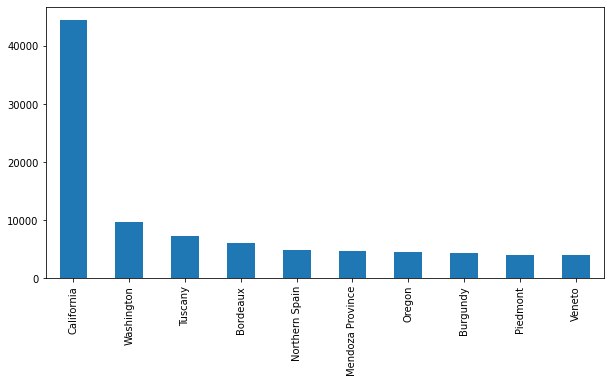

In [5]:
reviews['province'].value_counts().head(10).plot.bar()
plt.show()

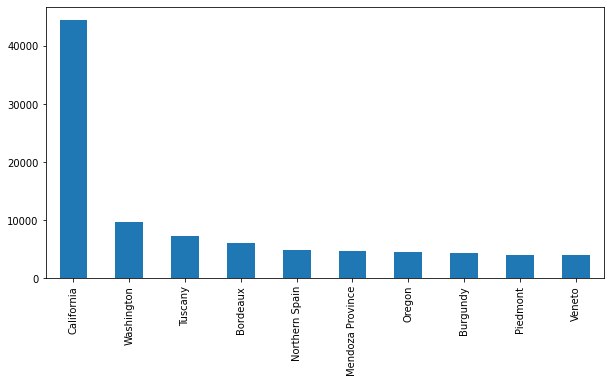

In [6]:
reviews['province'].value_counts().head(10).plot(kind='bar')
plt.show()

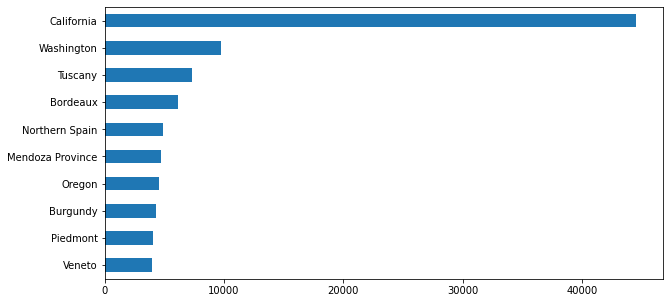

In [7]:
reviews['province'].value_counts(ascending=True).tail(10).plot.barh()
plt.show()

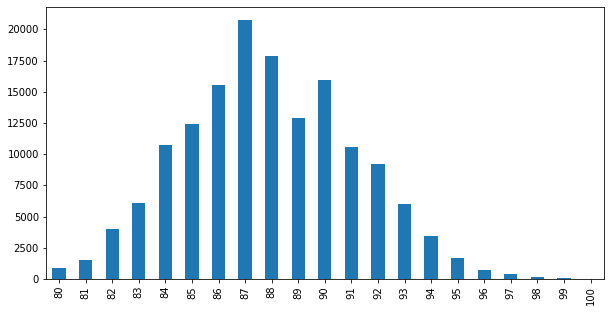

In [8]:
reviews['points'].value_counts().sort_index().plot.bar()
plt.show()

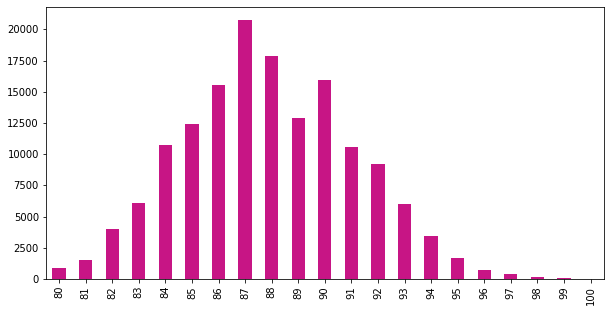

In [9]:
reviews['points'].value_counts().sort_index().plot.bar(
    color='mediumvioletred'
)
plt.show()

Добавление подписей к осям, их форматирование, добавлений названия и легенды возможно в виде последовательно заданных методов в той же ячейке, в которой происходит построение графика. Добавим, например, название графика распределения очков по винам. Основные параметры графика при этом были заданы внутри метода `plot.bar()`.

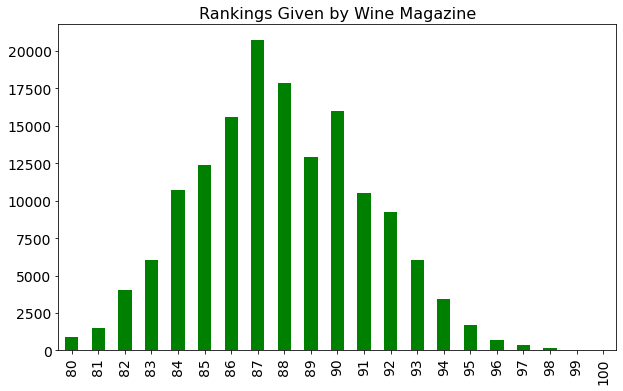

In [10]:
ax = reviews['points'].value_counts().sort_index().plot.bar(
    figsize=(10, 6),
    color='green',
    fontsize=14
)
ax.set_title("Rankings Given by Wine Magazine", fontsize=16)
plt.show()

Оценку распределения очков можно произвести с помощью методов:
- plot.line();
- plot.area();
- plot.hist().

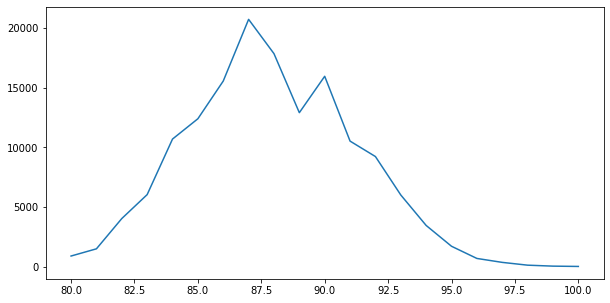

In [11]:
reviews['points'].value_counts().sort_index().plot.line();

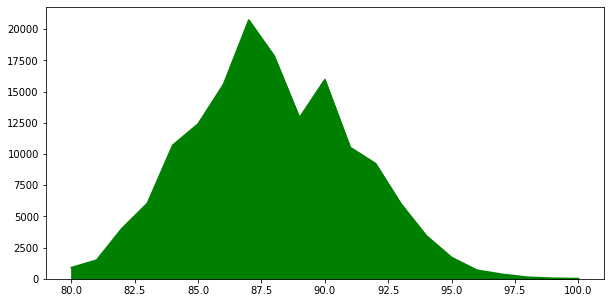

In [12]:
reviews['points'].value_counts().sort_index().plot.area(color='green');

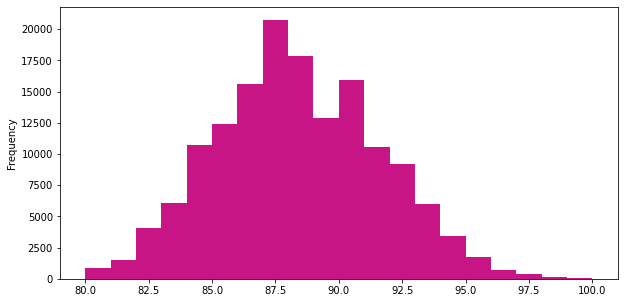

In [13]:
reviews['points'].plot.hist(bins=20, color='mediumvioletred');

<p><a name="dim2"></a></p>

## 1.2. Распределения двух переменных

<table>
<tr>
<td><img src="img/2dim-1.png" width="400px"/></td>
<td><img src="img/2dim-2.png" width="400px"/></td>
<td><img src="img/2dim-3.png" width="400px"/></td>
<td><img src="img/2dim-4.png" width="400px"/></td>
</tr>
<tr>
<td style="font-weight:bold; font-size:16px; text-align:center">Scatter Plot</td>
<td style="font-weight:bold; font-size:16px; text-align:center">Hex Plot</td>
<td style="font-weight:bold; font-size:16px; text-align:center">Stacked Bar Chart</td>
<td style="font-weight:bold; font-size:16px; text-align:center">Bivariate Line Chart</td>
</tr>
<tr>
<td style="text-align:center">df.plot.scatter()</td>
<td style="text-align:center">df.plot.hex()</td>
<td style="text-align:center">df.plot.bar(stacked=True)</td>
<td style="text-align:center">df.plot.line()</td>
</tr>
<tr>
<td style="text-align:center">Закономерности между парами признаков.</td>
<td style="text-align:center">Подходит для непрерывных и категориальных переменных.</td>
<td style="text-align:center">Зависимости между непрерывными и порядковыми переменными.</td>
<td style="text-align:center">Подходит для порядковых переменных и временных рядов.</td>
</tr>
</table>

Порой при проведении анализа взаимодействия переменных можно увидеть скрытые закономерности в данных.

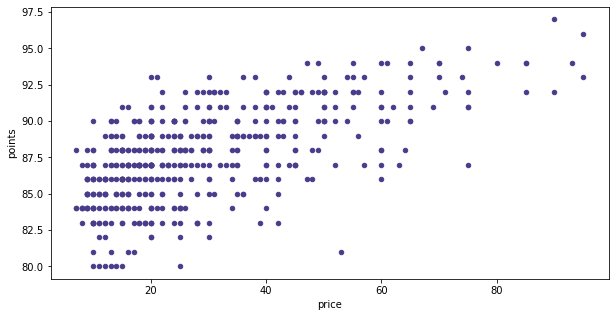

In [14]:
reviews[reviews['price'] < 100].sample(500).plot.scatter(x='price', y='points', 
                                                         color='darkslateblue'
                                                        );

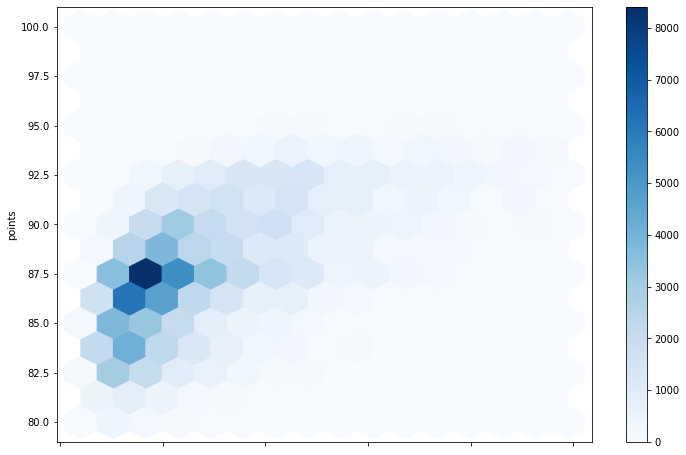

In [15]:
reviews[reviews['price'] < 100].plot.hexbin(x='price', y='points',
                                            figsize=(12,8), 
                                            gridsize=15, 
                                            cmap=plt.cm.Blues
                                           );

In [16]:
wine_counts = pd.read_csv("data/top-five-wine-score-counts.csv", index_col=0)

In [17]:
wine_counts.head()

,Bordeaux-style Red Blend,Cabernet Sauvignon,Chardonnay,Pinot Noir,Red Blend
points,,,,,
80,5.0,87.0,68.0,36.0,72.0
81,18.0,159.0,150.0,83.0,107.0
82,72.0,435.0,517.0,295.0,223.0
83,95.0,570.0,669.0,346.0,364.0
84,268.0,923.0,1146.0,733.0,602.0


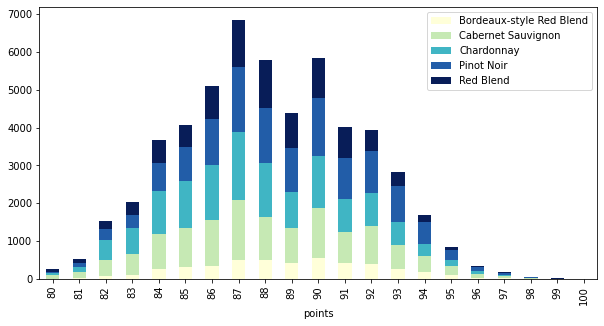

In [18]:
wine_counts.plot.bar(stacked=True, cmap='YlGnBu');

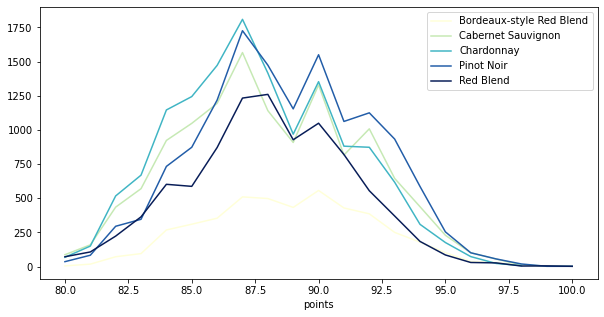

In [19]:
wine_counts.plot.line(cmap='YlGnBu');

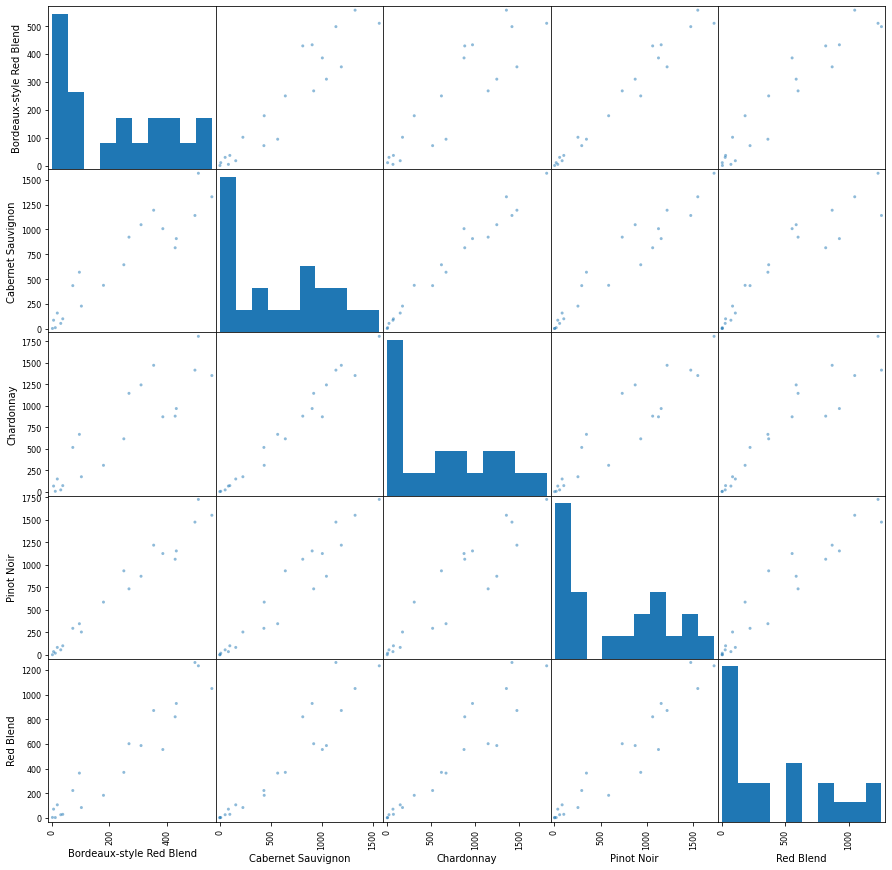

In [20]:
pd.plotting.scatter_matrix(wine_counts, 
                          figsize=(15, 15), 
                           diagonal='hist'
                          );

<p><a name="sub"></a></p>

## 1.3. Настройка графиков с помощью `subplots`

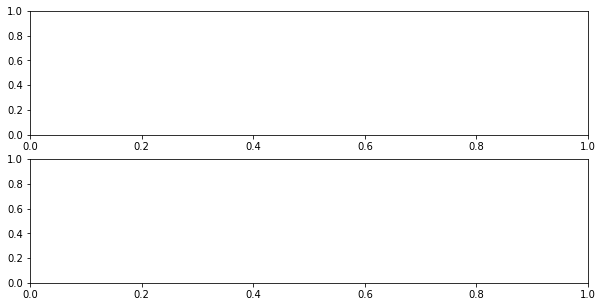

In [21]:
fig, axarr = plt.subplots(2, 1)

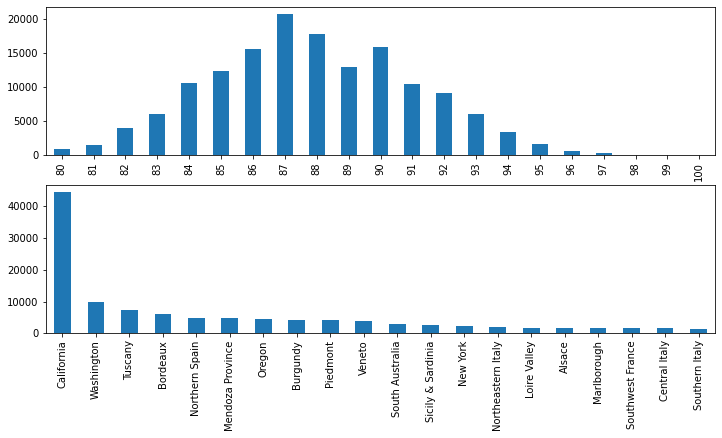

In [22]:
fig, axarr = plt.subplots(2, 1, figsize=(12,6))

reviews['points'].value_counts().sort_index().plot.bar(
    ax=axarr[0]
)

reviews['province'].value_counts().head(20).plot.bar(
    ax=axarr[1]
);

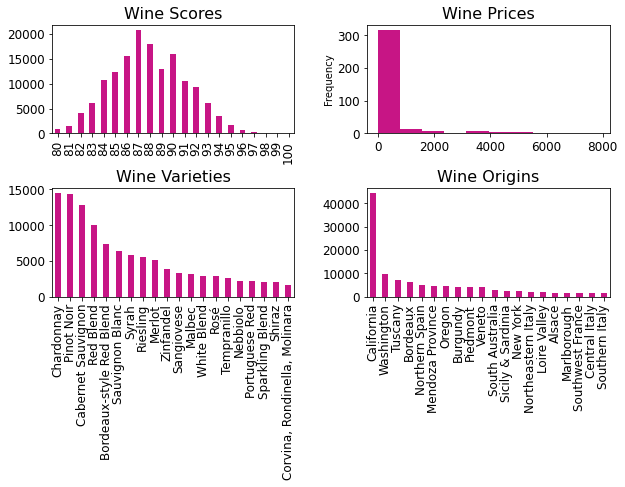

In [23]:
fig, axarr = plt.subplots(2, 2)

reviews['points'].value_counts().sort_index().plot.bar(
    ax=axarr[0, 0],
    fontsize=12,
    color='mediumvioletred'
)
axarr[0, 0].set_title("Wine Scores", fontsize=16)

reviews['variety'].value_counts().head(20).plot.bar(
    ax=axarr[1, 0], 
    fontsize=12, 
    color='mediumvioletred'
)
axarr[1, 0].set_title("Wine Varieties", fontsize=16)

reviews['province'].value_counts().head(20).plot.bar(
    ax=axarr[1, 1], 
    fontsize=12, 
    color='mediumvioletred'
)
axarr[1, 1].set_title("Wine Origins", fontsize=16)

reviews['price'].value_counts().plot.hist(
    ax=axarr[0, 1], 
    fontsize=12, 
    color='mediumvioletred'
)
axarr[0, 1].set_title("Wine Prices", fontsize=16)

plt.subplots_adjust(wspace=0.3, hspace=0.5)

<p><a name="seaborn"></a></p>

# 2. <a href="https://seaborn.pydata.org/examples/index.html">Seaborn</a>

Библиотека Seaborn предоставляет те же возможности, что и Matplotlib, однако отличается более удобными способами построения и форматирования графиков, а также, в целом, графики выглядят более красочными.

<table>
<tr>
<td><img src="img/sns-1.png" width="400px"/></td>
<td><img src="img/sns-2.png" width="400px"/></td>
<td><img src="img/sns-3.png" width="400px"/></td>
<td><img src="img/sns-9.png" width="400px"/></td>
</tr>
<tr>
<td style="font-weight:bold; font-size:16px; text-align:center">Distribution Plot</td>
<td style="font-weight:bold; font-size:16px; text-align:center">Violin Plot</td>
<td style="font-weight:bold; font-size:16px; text-align:center">Box Plot</td>
<td style="font-weight:bold; font-size:16px; text-align:center">Heatmap</td>
</tr>
<tr>
<td style="text-align:center">sns.distplot()</td>
<td style="text-align:center">sns.violinplot()</td>
<td style="text-align:center">sns.boxplot()</td>
<td style="text-align:center">sns.heatmap</td>
</tr>
<tr>
<td style="text-align:center">Позволяет посмотреть на распределение переменной.</td>
<td style="text-align:center">Более наглядное представление распределения.</td>
<td style="text-align:center">"Ящик с усами".</td>
<td style="text-align:center">Матрица коэффициентов корреляции между переменными.</td>
</tr>
</table>

c:\program files\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


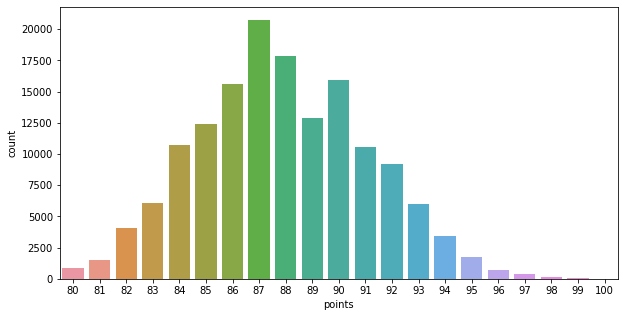

In [24]:
sns.countplot(reviews['points']);

In [33]:
price_sample = reviews[reviews['price'] < 200]['price']
reviews

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


c:\program files\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\program files\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


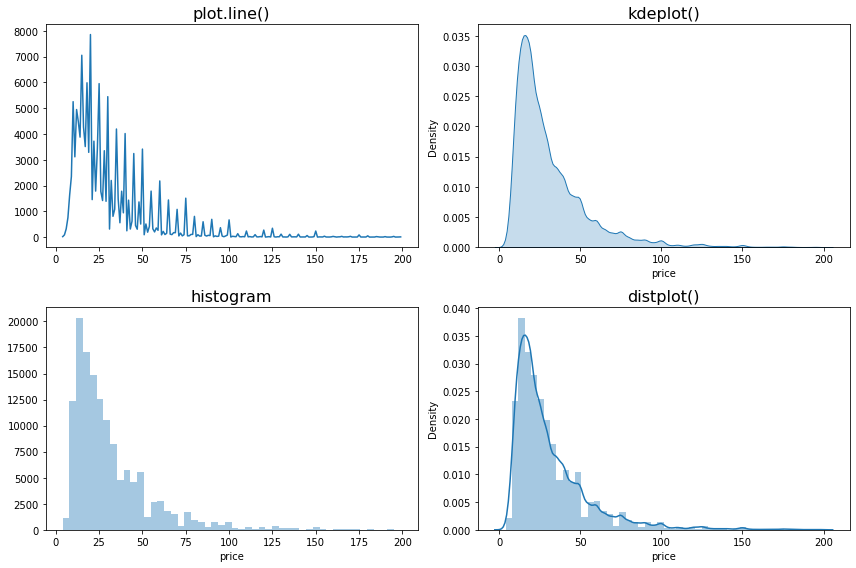

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))

price_sample.value_counts().sort_index().plot.line(ax=axes[0, 0]);
axes[0, 0].set_title("plot.line()", fontsize=16)

sns.distplot(price_sample, 
             hist=False, 
             kde_kws={"shade": True}, 
             ax=axes[0, 1]
            )
axes[0, 1].set_title("kdeplot()", fontsize=16)

sns.distplot(price_sample, 
             kde=False, 
             ax=axes[1, 0]
            )
axes[1, 0].set_title("histogram", fontsize=16)

sns.distplot(price_sample, 
             ax=axes[1, 1]
            )
axes[1, 1].set_title("distplot()", fontsize=16)

plt.tight_layout()

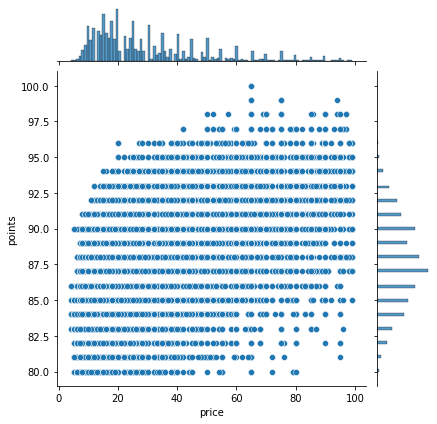

In [27]:
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100]);

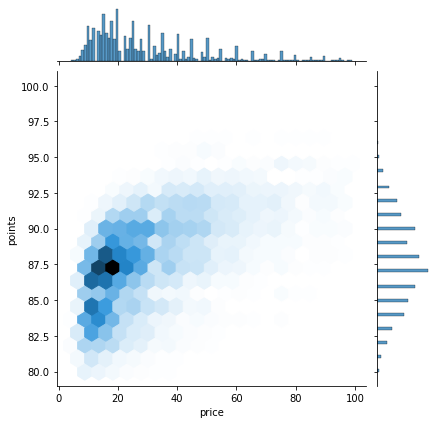

In [28]:
sns.jointplot(x='price', y='points', 
              data=reviews[reviews['price'] < 100], 
              kind='hex', 
              gridsize=20
             );

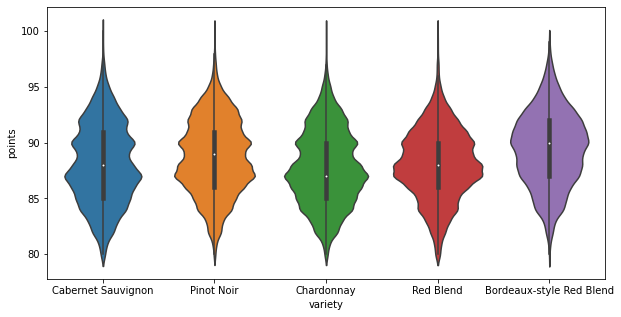

In [29]:
sns.violinplot(
    x='variety',
    y='points',
    data=reviews[reviews.variety.isin(reviews.variety.value_counts()[:5].index)]
);

In [35]:
reviews[reviews.variety.isin(reviews.variety.value_counts()[:5].index)]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm
11,US,"From 18-year-old vines, this supple well-balan...",Estate Vineyard Wadensvil Block,95,48.0,Oregon,Ribbon Ridge,Willamette Valley,Pinot Noir,Patricia Green Cellars
...,...,...,...,...,...,...,...,...,...,...
150908,France,"Another premier cru from Michel Gros, this one...",Aux Brulees,90,65.0,Burgundy,Vosne-Romanée,NaN,Pinot Noir,Michel Gros
150909,France,"This is a lovely, fragrant Burgundy, with a sm...",Clos dea Argillieres,89,52.0,Burgundy,Nuits-St.-Georges,NaN,Pinot Noir,Daniel Rion
150910,France,Scents of graham cracker and malted milk choco...,NaN,89,38.0,Burgundy,Chambolle-Musigny,NaN,Pinot Noir,Michel Gros
150911,France,"This needs a good bit of breathing time, then ...",Les Chaliots,87,37.0,Burgundy,Nuits-St.-Georges,NaN,Pinot Noir,Michel Gros


In [36]:
reviews

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


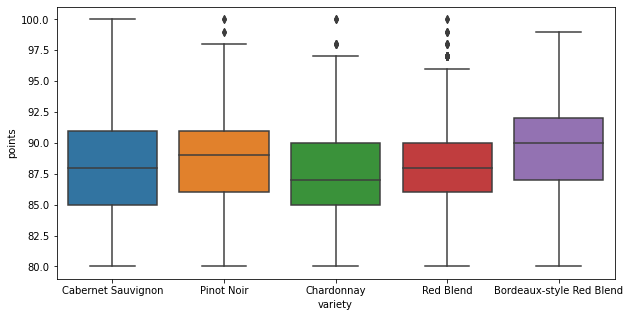

In [30]:
top_variety = reviews[reviews.variety.isin(reviews.variety.value_counts().head(5).index)]

sns.boxplot(
    x='variety',
    y='points',
    data=top_variety
);

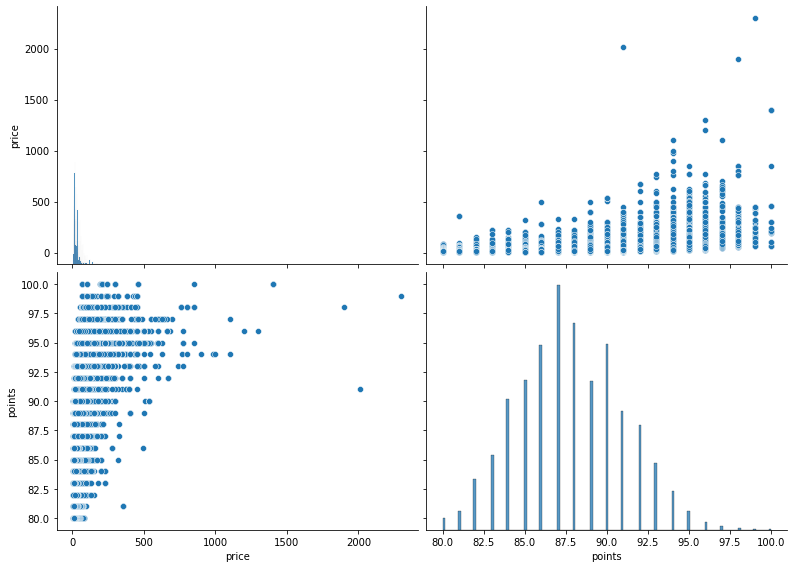

In [31]:
sns.pairplot(reviews[['price', 'points']].dropna(), height=4, aspect=1.4);

<div class="alert alert-info">

<h3> Упражнения (выполнять в отдельном файле)</h3>
<p>Для данных titanic.csv</p>

 <ol>
  <li>Cравнить распределения признаков с помощью distplot, violinplot, boxplot. Отформатировать графики.</li>
 <p></p>
 
  <li>Построить матрицу коэффициентов корреляции Спирмена для данных Титаника. Объяснить отличие от корреляции Пирсона и сделать выводы, почему для некоторых переменных корреляция Спирмена сильнее.</li>
          <p></p>
  

 </ol> 
</div>